Ê∑ªÂä†‰∫Ü17Ôºå19Âè∑Á∫ø  
df.drop Âà†Èô§ÂáΩÊï∞ ‰ΩøÁî®ÂèÇËÄÉhttps://blog.csdn.net/LHJCSDNYL/article/details/124784943  
df.loc Ê∑ªÂä†Ë°å https://www.zhihu.com/question/503434324  
‰∏çÂêåÈïøÂ∫¶ÁöÑÊï∞ÁªÑ‰∏çËÉΩÁõ¥Êé•Âä†ÂÖ•Ë°å/ÂàóÔºåÊöÇÊó∂ÁöÑËß£ÂÜ≥ÂäûÊ≥ïÊòØÊï∞ÁªÑÂêéÈù¢Âä†Á©∫Â≠óÁ¨¶ÔºàÊï∞ÁªÑËæÉÁü≠ÔºâÔºåÊàñËÄÖdataframeÂêéÈù¢Âä†Á©∫Ë°å/ÂàóÔºàÊï∞ÁªÑËæÉÈïøÔºâ  

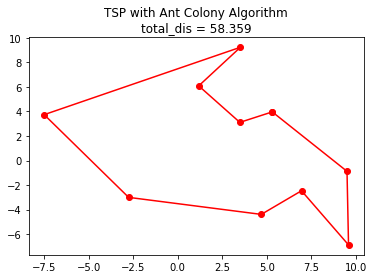

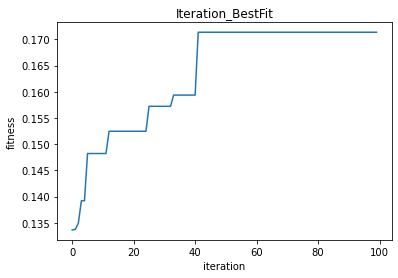

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

# ÈöèÊú∫ÁîüÊàêÂüéÂ∏Ç‰ø°ÊÅØ

for i in range(nCity):
    for j in range(nCity):
        if i > j:
            dis = ((City[i][0] - City[j][0]) ** 2 + (City[i][1] - City[j][1]) ** 2) ** 0.5
            Dis[(i, j)] = dis
            Dis[(j, i)] = dis

Data_BestFit =[]   #Áî®‰∫é‰øùÂ≠òÊØè‰∏Ä‰ª£ËöÇËöÅÁöÑÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶

#ÈÄÇÂ∫îÂ∫¶ËÆ°ÁÆóÂáΩÊï∞ ÈÄÇÂ∫îÂÄº= ÂüéÂ∏ÇÊï∞Èáè / Ë∑ØÂæÑË∑ùÁ¶ª
def Cal_Fit(X):
    total_dis = Dis[(X[-1], X[0])]
    for i in range(nCity - 1):
        total_dis += Dis[(X[i], X[i + 1])]
    return nCity / total_dis

def ACA_TSP():
    nPop = 100        # ÁßçÁæ§Â§ßÂ∞è
    Maxit = 100       # ÊúÄÂ§ßËø≠‰ª£Ê¨°Êï∞
    Rou = 1.0         # Ëí∏ÂèëÁ≥ªÊï∞
    Rou_damp = 0.95   # Ëí∏ÂèëÁ≥ªÊï∞Ë°∞ÂáèÂ∫¶
    Rou_min = 0.1     # ÊúÄÂ∞èËí∏ÂèëÁ≥ªÊï∞
    alpha = 1         # ‰ø°ÊÅØÁ¥†ÈáçË¶ÅÁ®ãÂ∫¶
    beta = 0.2        # ÂêØÂèëÂºè‰ø°ÊÅØÈáçË¶ÅÁ®ãÂ∫¶
    epsilon = 1e-5    # ÂàùÂßã‰ø°ÊÅØÁ¥†ÊµìÂ∫¶
    Phe = {}          # ‰øùÂ≠ò‰ø°ÊÅØÁ¥†ÁöÑÂ≠óÂÖ∏
    for key in Dis.keys():
        Phe[key] = epsilon

    Fit = [0.0 for i in range(nPop)]
    Best_Ant = None
    Best_Fit = -math.inf

    # Ëø≠‰ª£Ê±ÇËß£
    for j in range(Maxit):
        Ant = [[] for i in range(nPop)]
        #ËöÇËöÅÂØªË∑Ø
        for i in range(nPop):
            # ‰ª•Á¨¨‰∏Ä‰∏™ÂüéÂ∏Ç‰∏∫Ëµ∑ÁÇπÔºå‰æùÊ¨°‰ªéÂâ©‰∏ãÁöÑÂüéÂ∏Ç‰∏≠ÊåâÁÖßÊ¶ÇÁéáÊåëÈÄâÁõÆÊ†á
            # Open‰øùÂ≠òÂ∑≤Ë¢´ÈÄâÂèñÁöÑÂüéÂ∏Ç
            # Close‰øùÂ≠òÊú™Ë¢´ÈÄâÂèñÁöÑÂüéÂ∏Ç
            Open = [0]
            Close = [i for i in range(1,nCity)]
            while Close:
                if len(Close) == 1:
                    Open.append(Close.pop(0))
                else:
                    P = np.zeros([len(Close)])
                    for k in range(len(Close)):
                        P[k] = Phe[(Open[-1], Close[k])] ** alpha + Dis[(Open[-1], Close[k])] ** beta
                    P = P / sum(P)
                    next_index = np.random.choice(range(len(Close)), size=1, p=P)[0]
                    Open.append(Close.pop(next_index))
            Ant[i] = Open.copy()

        #ËÆ°ÁÆóÊØèÂè™ËöÇËöÅÁöÑË∑ØÂæÑÈÄÇÂ∫îÂÄº
        for i in range(nPop):
            Fit[i] = Cal_Fit(Ant[i])
            if Fit[i] > Best_Fit:
                Best_Fit = Fit[i]
                Best_Ant = Ant[i].copy()

        #Ê†πÊçÆËöÇËöÅË∑ØÂæÑÊõ¥Êñ∞‰ø°ÊÅØÁ¥†Ë°®
        for i in range(nPop):
            for k in range(nCity-1):
                Phe[(Ant[i][k],Ant[i][k+1])] = Fit[i] + \
                                               (1 - Rou) * Phe[(Ant[i][k],Ant[i][k+1])]
        Rou = max(Rou * Rou_damp ,Rou_min)

        Data_BestFit.append(Best_Fit)

    return Best_Ant, Best_Fit

# ÁªòÂà∂Ë∑ØÂæÑ‰∏éËø≠‰ª£Êõ≤Á∫ø
def Draw_City(City, X ,Best_Fit):
    X = list(X)
    X.append(X[0])
    coor_x = []
    coor_y = []
    for i in X:
        i = int(i)
        coor_x.append(City[i][0])
        coor_y.append(City[i][1])

    plt.plot(coor_x, coor_y, 'r-o')
    plt.title('TSP with Ant Colony Algorithm\n'+'total_dis = '+str(round(Best_Fit,3)))
    plt.show()

    plt.plot(range(len(Data_BestFit)), Data_BestFit)
    plt.title('Iteration_BestFit')
    plt.xlabel('iteration')
    plt.ylabel('fitness')
    plt.show()


if __name__ == '__main__':
    Best_X, Best_Fit = ACA_TSP()
    Draw_City(City, Best_X, (Best_Fit/nCity)**-1)





In [14]:
City

array([[ 5.30785468,  3.96298925],
       [ 1.17807483,  6.08522083],
       [ 4.69130159, -4.39248857],
       [ 9.58997793, -6.8811244 ],
       [-7.49918801,  3.73756751],
       [ 3.48853573,  3.10825224],
       [ 9.50458416, -0.88122516],
       [-2.75675926, -3.00510379],
       [ 3.52125262,  9.23299989],
       [ 6.95015112, -2.46618722]])

In [14]:
print(df.shape[1])
print(df.shape[0]) #Á≠â‰ª∑‰∫élen
print(df.shape) #ËøîÂõûdfË°åÊï∞ÔºåÂàóÊï∞ÁöÑÂàóË°®
print(len(df))
#Êúâ‰∏Ä‰∫õÊàëÁõ¥Êé•ÂÜôÊï∞Â≠ó‰∫Ü‚Ä¶‚Ä¶Âõ†‰∏∫‰∏çÁü•ÈÅìËøôÁé©ÊÑèÂàóÊï∞ÊòØÂï•‚Ä¶ÂèØ‰ª•ÊîπËøáÊù•

47
24
(24, 47)
24


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-A792-FFBEBEA9D981/tmp/ipykernel_1906/974196508.py:108: UserWarning: Glyph 27178 (\N{CJK UNIFIED IDEOGRAPH-6A2A}) missing from current font.
  plt.savefig(file_name + ".png", dpi=800)
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-A792-FFBEBEA9D981/tmp/ipykernel_1906/974196508.py:108: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  plt.savefig(file_name + ".png", dpi=800)
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-A792-FFBEBEA9D981/tmp/ipykernel_1906/974196508.py:108: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  plt.savefig(file_name + ".png", dpi=800)
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-

ÂàùÂßãË∑ØÁ∫øÔºö [11, 14, 3, 9, 6, 4, 13, 7, 8, 1, 12, 5, 2, 10]
ÂàùÂßãÊÄªË∑ùÁ¶ªÔºö 56.0122140089359
ÁªìÊùüÊ∏©Â∫¶‰∏∫Ôºö 0.0009120344560464498
ÊúÄ‰Ω≥Ë∑ØÁ∫øÔºö [9, 11, 8, 13, 7, 12, 6, 5, 4, 3, 14, 2, 1, 10]
ÊúÄ‰Ω≥Ë∑ùÁ¶ªÔºö 29.340520066994227


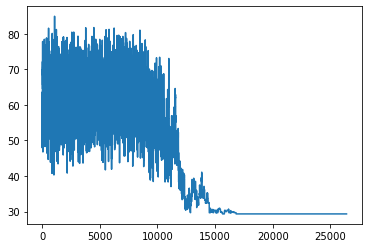

In [38]:
import copy
import math
import random
import matplotlib.pyplot as plt

# ÂàùÂßãÊ∏©Â∫¶
T0 = 1000
# ÁªàÊ≠¢Ê∏©Â∫¶
Tend = 1e-3
# ‰∏™Ê∏©Â∫¶‰∏ãÁöÑËø≠‰ª£Ê¨°Êï∞ÔºàÈìæÈïøÔºâ
L = 200
# ÈôçÊ∏©ÈÄüÁéá
q = 0.9
# ÂêÑ‰∏™ÂüéÂ∏ÇÁöÑÂùêÊ†á
X = [(16.4700, 96.1000),
     (16.4700, 94.4400),
     (20.0900, 92.5400),
     (22.3900, 93.3700),
     (25.2300, 97.2400),
     (22.0000, 96.0500),
     (20.4700, 97.0200),
     (17.2000, 96.2900),
     (16.3000, 97.3800),
     (14.0500, 98.1200),
     (16.5300, 97.3800),
     (21.5200, 95.5900),
     (19.4100, 97.1300),
     (20.0900, 92.5500)]


# ÊûÑÂª∫Ë∑ùÁ¶ªÁü©Èòµ
def build_distance():
    # ÂàùÂßãÂåñÂüéÂ∏ÇË∑ùÁ¶ªÁü©Èòµ
    distance = [[0 for _ in range(len(X))] for _ in range(len(X))]
    # ËÆ°ÁÆóÂêÑ‰∏™ÂüéÂ∏Ç‰πãÈó¥ÁöÑË∑ùÁ¶ª
    for i in range(len(X)):
        pos1 = X[i]
        for j in range(i+1, len(X)):
            pos2 = X[j]
            distance[i][j] = pow((pow(pos1[0] - pos2[0], 2) + pow(pos1[1] - pos2[1], 2)), 0.5)
            distance[j][i] = distance[i][j]
    return distance


# ‰∫ßÁîüÊñ∞ÁöÑË∑ØÂæÑËß£
def gen_new_path(path):
    new_path = copy.copy(path)
    # ÈöèÊú∫‰∫ßÁîü‰∏§‰∏™Á¥¢Âºï
    idx1 = random.randint(0, len(path) - 1)
    idx2 = random.randint(0, len(path) - 1)
    # ‰∫§Êç¢Ë∑ØÂæÑ‰∏≠ÁöÑ‰∏§‰∏™ÂüéÂ∏Ç
    temp = new_path[idx1]
    new_path[idx1] = new_path[idx2]
    new_path[idx2] = temp
    return new_path


# ËÆ°ÁÆóË∑ØÂæÑÊÄªË∑ùÁ¶ª
def path_distance(path, distance):
    total_distance = 0.0
    # Âæ™ÁéØË∑ØÂæÑ‰∏äÊâÄÊúâÂüéÂ∏ÇËøõË°åËÆ°ÁÆóÔºåÂà∞ÊúÄÂêé‰∏Ä‰∏™ÂüéÂ∏ÇËøîÂõûÂá∫ÂèëÂüéÂ∏Ç
    for i in range(len(path)):
        if i == len(path) - 1:
            total_distance += distance[path[i]][path[0]]
        else:
            total_distance += distance[path[i]][path[i + 1]]
    return total_distance


# MetropolisÂáÜÂàôÂáΩÊï∞
def metropolis(old_path, new_path, distance, t):
    # Ë∑ØÂæÑÁöÑËÉΩÈáèÂç≥Ë∑ØÂæÑ‰∏äÂêÑÂüéÂ∏ÇË∑ùÁ¶ª‰πãÂíå
    # Êñ∞Ë∑ØÂæÑÁöÑËÉΩÈáèÂáΩÊï∞ÂíåÊóßË∑ØÂæÑÁöÑËÉΩÈáèÂáΩÊï∞‰πãÂ∑Æ
    delta = path_distance(new_path, distance) - path_distance(old_path, distance)
    # Ëã•Êñ∞Ë∑ØÂæÑËÉΩÈáè‰Ωé‰∫éÊóßË∑ØÂæÑÔºåÂàôÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    if delta < 0:
        return copy.copy(new_path), path_distance(new_path, distance)
    # Ëã•Êñ∞Ë∑ØÂæÑËÉΩÈáèÈ´ò‰∫éÊóßË∑ØÂæÑÔºåÂàôÊåâexp(-delta/t)Ê¶ÇÁéáÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    if math.exp(-delta/t) >= random.uniform(0, 1):
        return copy.copy(new_path), path_distance(new_path, distance)
    # ‰∏çÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    return copy.copy(old_path), path_distance(old_path, distance)


# ÁªòÂà∂ÁªìÊûú
def draw_result(best, file_name="tsp_sa"):
    # ÂêÑ‰∏™ÂüéÂ∏ÇÁöÑÊ®™Á∫µÂùêÊ†á
    x = [pos[0] for pos in X]
    y = [pos[1] for pos in X]
    # ÁªòÂõæ‰∏≠ÊñáËÆæÁΩÆ
    plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ
    plt.rcParams['axes.unicode_minus'] = False
    # Ê∏ÖÁ©∫ÁîªÂ∏É
    plt.clf()
    # ÁªòÂà∂ÁÆ≠Â§¥
    for i in range(len(X)):
        # ÁÆ≠Â§¥ÂºÄÂßãÂùêÊ†á
        start = X[best[i]]
        # ÁÆ≠Â§¥ÁªìÊùüÂùêÊ†á
        end = X[best[i + 1]] if i < len(best) - 1 else X[best[0]]
        plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1], head_width=0.2, lw=1, length_includes_head=True)
    # ÁªòÂà∂ÂüéÂ∏ÇÁºñÂè∑
    for i in range(len(X)):
        plt.text(x[best[i]], y[best[i]], "{}".format((best[i] + 1)), size=15, color="r")
    plt.xlabel(u"Ê®™ÂùêÊ†á")
    plt.ylabel(u"Á∫µÂùêÊ†á")
    plt.savefig(file_name + ".png", dpi=800)


# ÁªòÂà∂ËøõÂåñËøáÁ®ã
def draw_evolution(evolution):
    x = [i for i in range(len(evolution))]
    # Ê∏ÖÁ©∫ÁîªÂ∏É
    plt.clf()
    plt.plot(x, evolution)
    plt.savefig('tsp_sa_evolution.png', dpi=800)


# Ê®°ÊãüÈÄÄÁÅ´ÁÆóÊ≥ï
def simulated_annealing():
    # ÂüéÂ∏ÇË∑ùÁ¶ªÁü©Èòµ
    distance = build_distance()
    # ÂüéÂ∏Ç‰∏™Êï∞
    city_cnt = len(distance)
    # ÂàùÂßãÂåñÂüéÂ∏ÇË∑ØÂæÑÔºåËøôÈáåÂèØ‰ª•ÈöèÊú∫ÁîüÊàêÔºå‰πüÂèØ‰ª•Ë∑ü‰π¶‰∏≠ÁöÑÂàùÂßãË∑ØÂæÑ‰øùÊåÅ‰∏ÄËá¥
    # path = random.sample(range(0, city_cnt), city_cnt)
    path = [10, 13, 2, 8, 5, 3, 12, 6, 7, 0, 11, 4, 1, 9]
    # ÁªòÂà∂ÂàùÂßãË∑ØÂæÑ
    draw_result(path, "init_path")
    # ÂàùÂßãË∑ØÁ∫øÈïøÂ∫¶
    total_distance = path_distance(path, distance)

    print("ÂàùÂßãË∑ØÁ∫øÔºö", [p + 1 for p in path])
    print("ÂàùÂßãÊÄªË∑ùÁ¶ªÔºö", total_distance)
    # Ê∏©Â∫¶
    t = T0
    # ËøõÂåñËøáÁ®ãÔºåÊØè‰∏ÄÊ¨°Ëø≠‰ª£ÁöÑË∑ØÂæÑÊÄªË∑ùÁ¶ª
    evolution = []
    # Âæ™ÁéØÁõ¥Âà∞ÂÜ∑Âç¥ÂêéÂÅúÊ≠¢
    while t > Tend:
        for _ in range(L):
            # ‰∫ßÁîüÊñ∞Ë∑ØÂæÑ
            new_path = gen_new_path(path)
            # Êõ¥Êñ∞ÊúÄ‰Ω≥Ë∑ØÂæÑÂèäÂØπÂ∫îÁöÑË∑ùÁ¶ª
            path, total_distance = metropolis(path, new_path, distance, t)
            # Êõ¥Êñ∞ËøõÂåñËøáÁ®ã
            evolution.append(total_distance)
        # ÈôçÊ∏©
        t = t * q
    # ÊâìÂç∞ÈÄÄÁÅ´Âêé‰ø°ÊÅØ
    print("ÁªìÊùüÊ∏©Â∫¶‰∏∫Ôºö", t)
    print("ÊúÄ‰Ω≥Ë∑ØÁ∫øÔºö", [p + 1 for p in path])
    print("ÊúÄ‰Ω≥Ë∑ùÁ¶ªÔºö", total_distance)
    # ÁªòÂà∂ÊúÄ‰Ω≥Ë∑ØÂæÑ
    draw_result(path, "tsp_sa_best")
    # ÁªòÂà∂ËøõÂåñËøáÁ®ã
    draw_evolution(evolution)


if __name__ == "__main__":
    simulated_annealing()




ÂéüÊñáhttps://blog.csdn.net/weixin_37522117/article/details/125149593?spm=1001.2101.3001.6650.3&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EESLANDING%7Edefault-3-125149593-blog-109305769.pc_relevant_landingrelevant&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EESLANDING%7Edefault-3-125149593-blog-109305769.pc_relevant_landingrelevant

In [ ]:
a = [1,2,3,7,-1,-4,-3]
for i in range(0,len(a)):
    sum = s[i]
    for j in range(i,len(a)):
        

In [3]:
distance= [[0, 2, 7, 1, 3, 6, 9, 5, 11, 10, 13],
 [2, 0, 5, 3, 1, 4, 7, 3, 9, 8, 11],
 [7, 5, 0, 7, 4, 1, 2, 6, 4, 3, 6],
 [1, 3, 7, 0, 4, 7, 9, 6, 11, 10, 13],
 [3, 1, 4, 4, 0, 3, 6, 2, 8, 7, 10],
 [6, 4, 1, 7, 3, 0, 3, 5, 5, 4, 7],
 [9, 7, 2, 9, 6, 3, 0, 8, 2, 1, 4],
 [5, 3, 6, 6, 2, 5, 8, 0, 7, 8, 9],
 [11, 9, 4, 11, 8, 5, 2, 7, 0, 1, 2],
 [10, 8, 3, 10, 7, 4, 1, 8, 1, 0, 3],
 [13, 11, 6, 13, 10, 7, 4, 9, 2, 3, 0]]

In [1]:
import random
distance = [[random.randint(1,10) for i in range(400)]for j in range(400)]
distance

[[1,
  2,
  5,
  4,
  7,
  10,
  9,
  5,
  7,
  5,
  6,
  4,
  6,
  7,
  7,
  10,
  4,
  7,
  7,
  5,
  7,
  5,
  7,
  4,
  6,
  3,
  9,
  6,
  2,
  9,
  5,
  2,
  4,
  2,
  3,
  4,
  8,
  7,
  6,
  4,
  1,
  8,
  6,
  2,
  7,
  5,
  8,
  5,
  4,
  9,
  3,
  4,
  6,
  8,
  4,
  5,
  1,
  4,
  9,
  3,
  9,
  8,
  2,
  8,
  1,
  4,
  9,
  7,
  8,
  9,
  7,
  8,
  6,
  8,
  5,
  5,
  7,
  3,
  9,
  2,
  6,
  10,
  2,
  5,
  3,
  3,
  2,
  6,
  8,
  1,
  7,
  1,
  10,
  7,
  5,
  6,
  2,
  2,
  1,
  8,
  7,
  6,
  10,
  5,
  1,
  4,
  1,
  3,
  9,
  9,
  9,
  2,
  10,
  4,
  9,
  7,
  6,
  6,
  4,
  1,
  6,
  8,
  4,
  9,
  5,
  5,
  3,
  3,
  5,
  5,
  8,
  6,
  4,
  7,
  10,
  8,
  3,
  1,
  10,
  2,
  10,
  9,
  8,
  7,
  8,
  2,
  3,
  3,
  2,
  1,
  9,
  6,
  7,
  5,
  3,
  5,
  9,
  1,
  7,
  3,
  2,
  2,
  2,
  1,
  7,
  4,
  5,
  1,
  5,
  8,
  10,
  6,
  1,
  1,
  5,
  7,
  3,
  6,
  1,
  9,
  3,
  6,
  7,
  7,
  1,
  5,
  7,
  2,
  9,
  2,
  5,
  8,
  8,
  2,
  8,
  2,
  2,
  1,


In [2]:
import copy
import math
import random
import matplotlib.pyplot as plt

# ÂàùÂßãÊ∏©Â∫¶
T0 = 1000
# ÁªàÊ≠¢Ê∏©Â∫¶
Tend = 1e-3
# ‰∏™Ê∏©Â∫¶‰∏ãÁöÑËø≠‰ª£Ê¨°Êï∞ÔºàÈìæÈïøÔºâ
L = 200
# ÈôçÊ∏©ÈÄüÁéá
q = 0.9
#Â¶ÇÊûúÊòØÈÄîÂæÑÂøÖÁªèÁÇπÔºàÊúâ‰∏çÂøÖË¶ÅÁöÑÁÇπÔºâ‰∏çÊòØÂøÖÁªèÁöÑÂèØ‰ª•‰∏çÁî®ÊîæËøõdistÁü©ÈòµÈáå

#Ëã•ÊåáÂÆöËµ∑ÁÇπÁªàÁÇπ
lst_s = [2,3]
lst_t = [i for i in range(1,len(distance)+1)]
#del lst_t[lst_s[0] - 1]
#del lst_t[lst_s[1] - 2]
lst_t.remove(len(distance))
lst_t.remove(1)
# ‰∫ßÁîüÊñ∞ÁöÑË∑ØÂæÑËß£
result = set()
def gen_new_path(path):
    new_path = copy.copy(path)
    # ÈöèÊú∫‰∫ßÁîü‰∏§‰∏™Á¥¢Âºï
    idx1 = random.sample(lst_t,1)[0] -1
    idx2 = random.sample(lst_t,1)[0] -1
    # ‰∫§Êç¢Ë∑ØÂæÑ‰∏≠ÁöÑ‰∏§‰∏™ÂüéÂ∏Ç
    temp = new_path[idx1]
    new_path[idx1] = new_path[idx2]
    new_path[idx2] = temp
    return new_path


# ËÆ°ÁÆóË∑ØÂæÑÊÄªË∑ùÁ¶ª
def path_distance(path, distance):
    total_distance = 0.0
    # Âæ™ÁéØË∑ØÂæÑ‰∏äÊâÄÊúâÂüéÂ∏ÇËøõË°åËÆ°ÁÆóÔºåÂà∞ÊúÄÂêé‰∏Ä‰∏™ÂüéÂ∏ÇËøîÂõûÂá∫ÂèëÂüéÂ∏Ç
    for i in range(len(path) -1):
        
            total_distance += distance[path[i]-1][path[i + 1]-1]
    return total_distance


# MetropolisÂáÜÂàôÂáΩÊï∞
def metropolis(old_path, new_path, distance, t):
    # Ë∑ØÂæÑÁöÑËÉΩÈáèÂç≥Ë∑ØÂæÑ‰∏äÂêÑÂüéÂ∏ÇË∑ùÁ¶ª‰πãÂíå
    # Êñ∞Ë∑ØÂæÑÁöÑËÉΩÈáèÂáΩÊï∞ÂíåÊóßË∑ØÂæÑÁöÑËÉΩÈáèÂáΩÊï∞‰πãÂ∑Æ
    delta = path_distance(new_path, distance) - path_distance(old_path, distance)
    # Ëã•Êñ∞Ë∑ØÂæÑËÉΩÈáè‰Ωé‰∫éÊóßË∑ØÂæÑÔºåÂàôÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    if delta < 0:
        return copy.copy(new_path), path_distance(new_path, distance)
    # Ëã•Êñ∞Ë∑ØÂæÑËÉΩÈáèÈ´ò‰∫éÊóßË∑ØÂæÑÔºåÂàôÊåâexp(-delta/t)Ê¶ÇÁéáÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    if math.exp(-delta/t) >= random.uniform(0, 1):
        return copy.copy(new_path), path_distance(new_path, distance)
    # ‰∏çÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    return copy.copy(old_path), path_distance(old_path, distance)



# ÁªòÂà∂ËøõÂåñËøáÁ®ã
def draw_evolution(evolution):
    x = [i for i in range(len(evolution))]
    # Ê∏ÖÁ©∫ÁîªÂ∏É
    plt.clf()
    plt.plot(x, evolution)


# Ê®°ÊãüÈÄÄÁÅ´ÁÆóÊ≥ï
def simulated_annealing():
    # ÂüéÂ∏Ç‰∏™Êï∞
    city_cnt = len(distance)
    # path = random.sample(range(0, city_cnt), city_cnt)
    path = [2,1,11,4,5,6,7,8,9,10,3]

    # ÂàùÂßãË∑ØÁ∫øÈïøÂ∫¶
    total_distance = path_distance(path, distance)
    print("ÂàùÂßãË∑ØÁ∫øÔºö", [p for p in path])
    print("ÂàùÂßãÊÄªË∑ùÁ¶ªÔºö", total_distance)
    # Ê∏©Â∫¶
    t = T0
    # ËøõÂåñËøáÁ®ãÔºåÊØè‰∏ÄÊ¨°Ëø≠‰ª£ÁöÑË∑ØÂæÑÊÄªË∑ùÁ¶ª
    evolution = []
    # Âæ™ÁéØÁõ¥Âà∞ÂÜ∑Âç¥ÂêéÂÅúÊ≠¢
    while t > Tend:
        for _ in range(L):
            # ‰∫ßÁîüÊñ∞Ë∑ØÂæÑ
            new_path = gen_new_path(path)
            # Êõ¥Êñ∞ÊúÄ‰Ω≥Ë∑ØÂæÑÂèäÂØπÂ∫îÁöÑË∑ùÁ¶ª
            path, total_distance = metropolis(path, new_path, distance, t)
            # Êõ¥Êñ∞ËøõÂåñËøáÁ®ã
            evolution.append(total_distance)
            if total_distance < 27:
                result.add(tuple(new_path))
        # ÈôçÊ∏©
        t = t * q
    # ÊâìÂç∞ÈÄÄÁÅ´Âêé‰ø°ÊÅØ
    print("ÁªìÊùüÊ∏©Â∫¶‰∏∫Ôºö", t)
    print("ÊúÄ‰Ω≥Ë∑ØÁ∫øÔºö", [p for p in path])
    print("ÊúÄ‰Ω≥Ë∑ùÁ¶ªÔºö", total_distance)
    # ÁªòÂà∂ËøõÂåñËøáÁ®ã
    draw_evolution(evolution)


if __name__ == "__main__":
    simulated_annealing()




ÂàùÂßãË∑ØÁ∫øÔºö [2, 1, 11, 4, 5, 6, 7, 8, 9, 10, 3]
ÂàùÂßãÊÄªË∑ùÁ¶ªÔºö 52.0


IndexError: list index out of range

In [7]:
len(result)

487

In [3]:
a = set()
a.add(tuple([2,1]))
a

{(2, 1)}

In [24]:
lst_s = [2,3]
lst_t = [i for i in range(1,len(distance)+1)]
del lst_t[lst_s[0] - 1]

del lst_t[lst_s[1] - 2]
random.sample(lst_t,1)[0]


11

In [35]:
random.randint(0,1)

1

ÂàùÂßãË∑ØÁ∫øÔºö [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

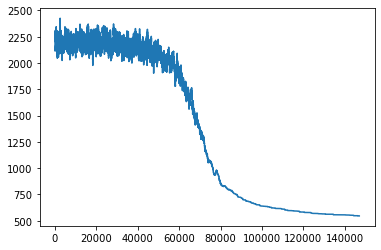

In [3]:
import copy
import math
import random
import time
import matplotlib.pyplot as plt
'''
distance=[[0, 3, 6, 1, 4, 7, 7, 6, 5, 6, 3],
 [3, 0, 5, 2, 1, 4, 7, 3, 6, 7, 4],
 [6, 5, 0, 5, 4, 1, 2, 6, 4, 3, 6],
 [1, 2, 5, 0, 3, 6, 6, 5, 4, 5, 2],
 [4, 1, 4, 3, 0, 3, 6, 2, 7, 7, 5],
 [7, 4, 1, 6, 3, 0, 3, 5, 5, 4, 7],
 [7, 7, 2, 6, 6, 3, 0, 8, 2, 1, 4],
 [6, 3, 6, 5, 2, 5, 8, 0, 7, 8, 7],
 [5, 6, 4, 4, 7, 5, 2, 7, 0, 1, 2],
 [6, 7, 3, 5, 7, 4, 1, 8, 1, 0, 3],
 [3, 4, 6, 2, 5, 7, 4, 7, 2, 3, 0]]
 '''
starttime = time.time()
#ÂàùÂßãÊ∏©Â∫¶
T0 = 5000
# ÁªàÊ≠¢Ê∏©Â∫¶
Tend = 1e-3
#Ê∏©Â∫¶‰∏ãÁöÑËø≠‰ª£Ê¨°Êï∞ÔºàÈìæÈïøÔºâ
L = 250
#ÈôçÊ∏©ÈÄüÁéá
q = 0.9
res = set() #Â≠òÂÇ®Ë∑ØÂæÑ
#‰∫ßÁîüÊñ∞ÁöÑË∑ØÂæÑËß£
def gen_new_path(path):
    new_path = copy.copy(path)
    idx1 = random.randint(0, len(path) - 1)
    idx2 = random.randint(0, len(path) - 1)
    #ÈöèÊú∫‰∫§Êç¢‰∏§‰∏™ÂüéÂ∏Ç
    temp = new_path[idx1]
    new_path[idx1] = new_path[idx2]
    new_path[idx2] = temp
    return new_path


#ËÆ°ÁÆóË∑ØÂæÑÊÄªË∑ùÁ¶ª
def path_distance(path, distance):
    total_distance = 0.0
    for i in range(len(path) - 1):
            total_distance += distance[path[i]-1][path[i + 1]-1]
    return total_distance


# MetropolisÂáÜÂàôÂáΩÊï∞
def metropolis(old_path, new_path, distance, t):
    # Ë∑ØÂæÑÁöÑËÉΩÈáèÂç≥Ë∑ØÂæÑ‰∏äÂêÑÂüéÂ∏ÇË∑ùÁ¶ª‰πãÂíå
    # Êñ∞Ë∑ØÂæÑÁöÑËÉΩÈáèÂáΩÊï∞ÂíåÊóßË∑ØÂæÑÁöÑËÉΩÈáèÂáΩÊï∞‰πãÂ∑Æ
    delta = path_distance(new_path, distance) - path_distance(old_path, distance)
    # Ëã•Êñ∞Ë∑ØÂæÑËÉΩÈáè‰Ωé‰∫éÊóßË∑ØÂæÑÔºåÂàôÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    if delta < 0:
        return copy.copy(new_path), path_distance(new_path, distance)
    # Ëã•Êñ∞Ë∑ØÂæÑËÉΩÈáèÈ´ò‰∫éÊóßË∑ØÂæÑÔºåÂàôÊåâexp(-delta/t)Ê¶ÇÁéáÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    if math.exp(-delta/t) >= random.uniform(0, 1):
        return copy.copy(new_path), path_distance(new_path, distance)
    # ‰∏çÊé•ÂèóÊñ∞Ë∑ØÂæÑËß£
    return copy.copy(old_path), path_distance(old_path, distance)



# ÁªòÂà∂ËøõÂåñËøáÁ®ã
def draw_evolution(evolution):
    x = [i for i in range(len(evolution))]
    plt.clf()
    plt.plot(x, evolution)
    plt.savefig('tsp_sa_evolution.png', dpi=800)


# Ê®°ÊãüÈÄÄÁÅ´ÁÆóÊ≥ï
def simulated_annealing():
    city_cnt = len(distance)
    # ÂàùÂßãÂåñÂüéÂ∏ÇË∑ØÂæÑÔºåËøôÈáå‰ΩøÁî®0Âà∞nÁöÑÈ°∫Â∫è
    # path = random.sample(range(0, city_cnt), city_cnt)
    path = [i for i in range(1,len(distance)+1)]
    # ÁªòÂà∂ÂàùÂßãË∑ØÂæÑ

    # ÂàùÂßãË∑ØÁ∫øÈïøÂ∫¶
    total_distance = path_distance(path, distance)
    print("ÂàùÂßãË∑ØÁ∫øÔºö", [p for p in path])
    print("ÂàùÂßãÊÄªË∑ùÁ¶ªÔºö", total_distance)
    # Ê∏©Â∫¶
    t = T0
    # ËøõÂåñËøáÁ®ãÔºåÊØè‰∏ÄÊ¨°Ëø≠‰ª£ÁöÑË∑ØÂæÑÊÄªË∑ùÁ¶ª
    evolution = []
    # Âæ™ÁéØÁõ¥Âà∞ÂÜ∑Âç¥ÂêéÂÅúÊ≠¢
    while t > Tend:
        for _ in range(L):
            # ‰∫ßÁîüÊñ∞Ë∑ØÂæÑ
            new_path = gen_new_path(path)
            # Êõ¥Êñ∞ÊúÄ‰Ω≥Ë∑ØÂæÑÂèäÂØπÂ∫îÁöÑË∑ùÁ¶ª
            path, total_distance = metropolis(path, new_path, distance, t)
            # Êõ¥Êñ∞ËøõÂåñËøáÁ®ã
            evolution.append(total_distance)
            '''            pp = []
            for i in range(len(path)-1):
                tempp=shortp[path[i]-1][path[i+1]-1]
                for n in range(0,len(tempp)-1):
                    pp.append(tempp[n])
            pp.append(path[len(path)-1])
            if total_distance <= 16:
                res.add(tuple(pp))'''

                
        #ÈôçÊ∏©
        t = t * q
    print(path)
   # print("ÊúÄ‰Ω≥Ë∑ØÁ∫øÔºö", [p for p in pp])
    print("ÊúÄ‰Ω≥Ë∑ùÁ¶ªÔºö", total_distance)
    #Ëø≠‰ª£ËøáÁ®ã
    draw_evolution(evolution)


if __name__ == "__main__":
    simulated_annealing()
    endtime= time.time()
    print(endtime-starttime)



In [14]:
res

{(8, 5, 2, 4, 1, 4, 11, 9, 10, 7, 3, 6)}

In [38]:
import copy,random
def gen_new_path(path):
    new_path = copy.copy(path)
    # ÈöèÊú∫‰∫ßÁîü‰∏§‰∏™Á¥¢Âºï
    idx1 = random.randint(0, len(path) - 1)
    idx2 = random.randint(0, len(path) - 1)
    # ‰∫§Êç¢Ë∑ØÂæÑ‰∏≠ÁöÑ‰∏§‰∏™ÂüéÂ∏Ç
    temp = new_path[idx1]
    new_path[idx1] = new_path[idx2]
    new_path[idx2] = temp
    t = []
    for i in range(len(new_path) - 1):
        t.append(pass_path[new_path[i]-1][new_path[i+1]-1])
    return new_path,t

In [22]:
gen_new_path([7, 3, 6, 5, 2, 4, 1, 8, 11, 9, 10])

[7, 3, 11, 5, 2, 4, 1, 8, 6, 9, 10]

In [6]:
path = [7, 3, 6, 5, 2, 4, 1, 8, 11, 9, 10]
def path_distance(path, distance):
    total_distance = 0.0
    # Âæ™ÁéØË∑ØÂæÑ‰∏äÊâÄÊúâÂüéÂ∏ÇËøõË°åËÆ°ÁÆóÔºåÂà∞ÊúÄÂêé‰∏Ä‰∏™ÂüéÂ∏ÇËøîÂõûÂá∫ÂèëÂüéÂ∏Ç
    for i in range(len(path)):
        if i == len(path) - 1:
            total_distance += distance[path[i]-1][path[0]-1]
        else:
            total_distance += distance[path[i]-1][path[i + 1]-1]
        print(total_distance)
    return total_distance
path_distance(path, distance)


2.0
3.0
6.0
7.0
10.0
11.0
16.0
25.0
27.0
28.0
29.0


29.0

In [46]:
len(distance)

11

In [3]:
line19 = ['19Âè∑Á∫ø','Êñ∞ÂÆ´Á´ô','Êñ∞ÂèëÂú∞Á´ô','ËçâÊ°•Á´ô','ÁâõË°óÁ´ô','ÁßØÊ∞¥ÊΩ≠Á´ô','Áâ°‰∏πÂõ≠Á´ô']
line17 = ['17Âè∑Á∫ø','‰∫¶Â∫ÑÁ´ôÂâçÂå∫Âçó','Ê¨°Ê∏†','Ê¨°Ê∏†Âåó','ÂåóÁ•ûÊ†ë','ÊúùÈò≥Ê∏Ø','ÂçÅÂÖ´ÈáåÂ∫ó','ÂçÅÈáåÊ≤≥']
for i in range(40):
    line19.append('')
for i in range(47-len(line17)):
    line17.append('')
print(line19)
print(len(line19))
print(line17,len(line17))

['19Âè∑Á∫ø', 'Êñ∞ÂÆ´Á´ô', 'Êñ∞ÂèëÂú∞Á´ô', 'ËçâÊ°•Á´ô', 'ÁâõË°óÁ´ô', 'ÁßØÊ∞¥ÊΩ≠Á´ô', 'Áâ°‰∏πÂõ≠Á´ô', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
47
['17Âè∑Á∫ø', '‰∫¶Â∫ÑÁ´ôÂâçÂå∫Âçó', 'Ê¨°Ê∏†', 'Ê¨°Ê∏†Âåó', 'ÂåóÁ•ûÊ†ë', 'ÊúùÈò≥Ê∏Ø', 'ÂçÅÂÖ´ÈáåÂ∫ó', 'ÂçÅÈáåÊ≤≥', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 47


In [5]:
import csv
import pandas as pd
f = 'subway 2.csv'
df= pd.read_csv(f)
df.loc[21]=line19
df.loc[22]= line17
print(df)

       1Âè∑Á∫ø     ËãπÊûúÂõ≠     Âè§Âüé ÂÖ´ËßíÊ∏∏‰πêÂõ≠     ÂÖ´ÂÆùÂ±±     ÁéâÊ≥âË∑Ø     ‰∫îÊ£µÊùæ    ‰∏áÂØøË∑Ø     ÂÖ¨‰∏ªÂùü  \
0      2Âè∑Á∫ø     Ë•øÁõ¥Èó®    ÁßØÊ∞¥ÊΩ≠  ÈºìÊ•ºÂ§ßË°ó     ÂÆâÂÆöÈó®     ÈõçÂíåÂÆ´     ‰∏úÁõ¥Èó®   ‰∏úÂõõÂçÅÊù°     ÊúùÈò≥Èó®   
1   4Âè∑Á∫øÂ§ßÂÖ¥Á∫ø    ÂÆâÊ≤≥Ê°•Âåó    ÂåóÂÆ´Èó®    Ë•øËãë     ÂúÜÊòéÂõ≠  Âåó‰∫¨Â§ßÂ≠¶‰∏úÈó®     ‰∏≠ÂÖ≥Êùë   Êµ∑Ê∑ÄÈªÑÂ∫Ñ    ‰∫∫Ê∞ëÂ§ßÂ≠¶   
2      5Âè∑Á∫ø    Â§©ÈÄöËãëÂåó    Â§©ÈÄöËãë  Â§©ÈÄöËãëÂçó     Á´ãÊ∞¥Ê°•    Á´ãÊ∞¥Ê°•Âçó    ÂåóËãëË∑ØÂåó   Â§ßÂ±Ø‰∏úË∑Ø  ÊÉ†Êñ∞ÂõõË°óÂåóÂè£   
3      6Âè∑Á∫ø   Êµ∑Ê∑Ä‰∫îË∑ØÂ±Ö    ÊÖàÂØøÂØ∫   Ëä±Âõ≠Ê°•    ÁôΩÁü≥Ê°•Âçó    ËΩ¶ÂÖ¨Â∫ÑË•ø     ËΩ¶ÂÖ¨Â∫Ñ    Âπ≥ÂÆâÈáå     ÂåóÊµ∑Âåó   
4      7Âè∑Á∫ø    Âåó‰∫¨Ë•øÁ´ô     ÊπæÂ≠ê   ËææÂÆòËê•    ÂπøÂÆâÈó®ÂÜÖ     ËèúÂ∏ÇÂè£     ËôéÂùäÊ°•    Áè†Â∏ÇÂè£      Ê°•Êπæ   
5      8Âè∑Á∫ø     Êú±ËæõÂ∫Ñ    ËÇ≤Áü•Ë∑Ø   Âπ≥Ë•øÂ∫ú  ÂõûÈæôËßÇ‰∏úÂ§ßË°ó      ÈúçËê•      ËÇ≤Êñ∞    Ë•øÂ∞èÂè£     Ê∞∏Ê≥∞Â∫Ñ   
6    8Âè∑Á∫øÂçóÊÆµ     Áè†Â∏ÇÂè£     Â§©Ê°•  Ê∞∏ÂÆöÈó®Â§ñ     Êú®Ê®®Âõ

ÁÑ∂ÂêéÊòØÊñ∞Âª∫‰∏Ä‰∏™Êç¢‰πòÁ´ôÁöÑË°®Ê†ºÔºåÈÅçÂéÜ‰∏ÄÈÅçÔºåËÆ∞ÂΩïÊØè‰∏Ä‰∏™Â∞è‰∏úË•øÂá∫Áé∞Ê¨°Êï∞ÔºåÂá∫Áé∞Ê¨°Êï∞Â§ß‰∫éÁ≠â‰∫é2ÁöÑ‰øùÁïôÂêçÂ≠ó    
value_countsÂáΩÊï∞‰∏çÁü•ÈÅìËÉΩ‰∏çËÉΩÁî®ÔºåÊÑüËßâ‰∏çÊòØÊàëÊÉ≥Ë¶ÅÁöÑ‚Ä¶  
[Á¥¢ÂºïÁÆÄ‰ªã](https://blog.csdn.net/weixin_46713695/article/details/125959391?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-1-125959391-blog-108586925.pc_relevant_3mothn_strategy_recovery&spm=1001.2101.3001.4242.2&utm_relevant_index=4)  
[dfËØªÂèñcsvÊó∂ÊòØÂê¶Ê∑ªÂä†Á¥¢Âºï](https://blog.csdn.net/bjwhile/article/details/115447060?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164793529016780255256672%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=164793529016780255256672&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-2-115447060.142%5Ev3%5Epc_search_insert_es_download,143%5Ev4%5Econtrol&utm_term=dataframeËØªÂèñÊñá‰ª∂Êó∂‰øÆÊîπÂàóÁ¥¢Âºï&spm=1018.2226.3001.4187)  
iloc.[0, 1:]Ë°®Á§∫ÂÜôÂÖ•Êï∞ÊçÆÂà∞ Èô§ÂºÄË°®Â§¥ÂêéÁöÑÁ¨¨‰∏ÄË°åÔºåÂíåÁ¨¨‰∏ÄÂàó‰πãÂêéÁöÑÊâÄÊúâÂàó„ÄÇ

In [2]:
import pandas as pd
import csv
with open('subway 2.csv','r')as file:
    reader = csv.reader(file)
    data = []
    for line in reader:
        data.append(line)
'''
for i in range(24,47):
    data[0][i]=''
print(data)
'''
#ÊïëÂëΩ„ÄÇ„ÄÇÊÄé‰πàÊääÁ¨¨‰∏ÄË°åÂΩìÊàêÁ¥¢ÂºïË°å‰∫ÜÊàëÁöÑÂ¶àÂëÄ Á©∫ÁöÑÂú∞ÊñπËá™Âä®Ê∑ªÂä†‰∫ÜunnamedÔºàÔºüÔºâ
#ÊääunnameÊç¢ÊàêÁ©∫Â≠óÁ¨¶Âêé‚Ä¶Á¨¨‰∏ÄË°åÁöÑÂàóindexÂ∞±ÂèòÊàêÊï∞Â≠ó‰∫ÜÔºå‰ΩÜÊòØÂÜôÂÖ•csvÁöÑÊó∂ÂÄô‰ºöËøõÂéª‚Ä¶
f = 'subway 2.csv'
df= pd.read_csv(f,header = 0)
print(df)

         0       1      2      3       4       5       6      7       8  \
0      1Âè∑Á∫ø     ËãπÊûúÂõ≠     Âè§Âüé  ÂÖ´ËßíÊ∏∏‰πêÂõ≠     ÂÖ´ÂÆùÂ±±     ÁéâÊ≥âË∑Ø     ‰∫îÊ£µÊùæ    ‰∏áÂØøË∑Ø     ÂÖ¨‰∏ªÂùü   
1      2Âè∑Á∫ø     Ë•øÁõ¥Èó®    ÁßØÊ∞¥ÊΩ≠   ÈºìÊ•ºÂ§ßË°ó     ÂÆâÂÆöÈó®     ÈõçÂíåÂÆ´     ‰∏úÁõ¥Èó®   ‰∏úÂõõÂçÅÊù°     ÊúùÈò≥Èó®   
2   4Âè∑Á∫øÂ§ßÂÖ¥Á∫ø    ÂÆâÊ≤≥Ê°•Âåó    ÂåóÂÆ´Èó®     Ë•øËãë     ÂúÜÊòéÂõ≠  Âåó‰∫¨Â§ßÂ≠¶‰∏úÈó®     ‰∏≠ÂÖ≥Êùë   Êµ∑Ê∑ÄÈªÑÂ∫Ñ    ‰∫∫Ê∞ëÂ§ßÂ≠¶   
3      5Âè∑Á∫ø    Â§©ÈÄöËãëÂåó    Â§©ÈÄöËãë   Â§©ÈÄöËãëÂçó     Á´ãÊ∞¥Ê°•    Á´ãÊ∞¥Ê°•Âçó    ÂåóËãëË∑ØÂåó   Â§ßÂ±Ø‰∏úË∑Ø  ÊÉ†Êñ∞ÂõõË°óÂåóÂè£   
4      6Âè∑Á∫ø   Êµ∑Ê∑Ä‰∫îË∑ØÂ±Ö    ÊÖàÂØøÂØ∫    Ëä±Âõ≠Ê°•    ÁôΩÁü≥Ê°•Âçó    ËΩ¶ÂÖ¨Â∫ÑË•ø     ËΩ¶ÂÖ¨Â∫Ñ    Âπ≥ÂÆâÈáå     ÂåóÊµ∑Âåó   
5      7Âè∑Á∫ø    Âåó‰∫¨Ë•øÁ´ô     ÊπæÂ≠ê    ËææÂÆòËê•    ÂπøÂÆâÈó®ÂÜÖ     ËèúÂ∏ÇÂè£     ËôéÂùäÊ°•    Áè†Â∏ÇÂè£      Ê°•Êπæ   
6      8Âè∑Á∫ø     Êú±ËæõÂ∫Ñ    ËÇ≤Áü•Ë∑Ø    Âπ≥Ë•øÂ∫ú  ÂõûÈæôËßÇ‰∏úÂ§ßË°ó      ÈúçËê•      ËÇ≤Êñ∞    Ë•øÂ∞èÂè£     Ê

In [3]:
import numpy as np
arr0 = np.zeros((24,47))
df0 = pd.DataFrame(arr0)
#Âà§Êñ≠Êüê‰∏ÄÁ´ôÁöÑÂá∫Áé∞Ê¨°Êï∞
def if_trans(str):
    time = 0
    for n in range(24):
        for i in range(47):
            if df.iat[n,i] == str:
                time += 1
    return time   
for n in range(24):
    for i in range(47):
        name = df.iat[n,i]
        df0.iat[n,i] = if_trans(name)

print(df0)

     0    1    2    3    4    5    6    7    8    9   ...   37   38   39   40  \
0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  ...  0.0  0.0  0.0  0.0   
1   1.0  4.0  1.0  2.0  1.0  2.0  3.0  1.0  2.0  2.0  ...  0.0  0.0  0.0  0.0   
2   1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
3   1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  1.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
5   1.0  2.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
6   1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
7   1.0  2.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
8   1.0  2.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
9   1.0  3.0  1.0  2.0  1.0  2.0  1.0  1.0  1.0  2.0  ...  2.0  2.0  1.0  2.0   
10  1.0  4.0  1.0  2.0  1.0  1.0  2.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
11  1.0  1.0  1.0  1.0  2.0 

In [12]:
num = 0
for a in range(df.shape[0]):
    for b in range(df.shape[1]):
        if df0.iat[a,b] > 1:
            num += 1
            print(df.iat[a,b])
            
print(num)

ÂÖ¨‰∏ªÂùü
ÂÜõ‰∫ãÂçöÁâ©È¶Ü
Â§çÂÖ¥Èó®
Ë•øÂçï
‰∏úÂçï
Âª∫ÂõΩÈó®
ÂõΩË¥∏
Â§ßÊúõË∑Ø
ÂõõÊÉ†
ÂõõÊÉ†‰∏ú
Ë•øÁõ¥Èó®
ÈºìÊ•ºÂ§ßË°ó
ÈõçÂíåÂÆ´
‰∏úÁõ¥Èó®
ÊúùÈò≥Èó®
Âª∫ÂõΩÈó®
Â¥áÊñáÈó®
ÂÆ£Ê≠¶Èó®
Â§çÂÖ¥Èó®
ËΩ¶ÂÖ¨Â∫Ñ
Ë•øÁõ¥Èó®
Ë•øËãë
Êµ∑Ê∑ÄÈªÑÂ∫Ñ
ÂõΩÂÆ∂Âõæ‰π¶È¶Ü
Ë•øÁõ¥Èó®
Âπ≥ÂÆâÈáå
Ë•øÂçï
ÂÆ£Ê≠¶Èó®
ËèúÂ∏ÇÂè£
Âåó‰∫¨ÂçóÁ´ô
ËßíÈó®Ë•ø
Á´ãÊ∞¥Ê°•
ÈõçÂíåÂÆ´
‰∏úÂçï
Â¥áÊñáÈó®
Á£ÅÂô®Âè£
Ëí≤ÈªÑÊ¶Ü
ÂÆãÂÆ∂Â∫Ñ
ÊÖàÂØøÂØ∫
ÁôΩÁü≥Ê°•Âçó
ËΩ¶ÂÖ¨Â∫Ñ
Âπ≥ÂÆâÈáå
ÂçóÈî£ÈºìÂ∑∑
ÊúùÈò≥Èó®
ÂëºÂÆ∂Ê•º
ÈáëÂè∞Ë∑Ø
Âåó‰∫¨Ë•øÁ´ô
ËèúÂ∏ÇÂè£
Áè†Â∏ÇÂè£
Á£ÅÂô®Âè£
‰πùÈæôÂ±±
Êú±ËæõÂ∫Ñ
ÈúçËê•
Â••ÊûóÂåπÂÖãÂÖ¨Âõ≠
ÂåóÂúüÂüé
ÈºìÊ•ºÂ§ßË°ó
ÂçóÈî£ÈºìÂ∑∑
Áè†Â∏ÇÂè£
Ê∞∏ÂÆöÈó®Â§ñ
ÈÉ≠ÂÖ¨Â∫Ñ
‰∏ÉÈáåÂ∫Ñ
ÂÖ≠ÈáåÊ°•
Âåó‰∫¨Ë•øÁ´ô
ÂÜõ‰∫ãÂçöÁâ©È¶Ü
ÁôΩÁü≥Ê°•Âçó
ÂõΩÂÆ∂Âõæ‰π¶È¶Ü
Â∑¥Ê≤ü
Êµ∑Ê∑ÄÈªÑÂ∫Ñ
Áü•Êò•Ë∑Ø
ÂåóÂúüÂüé
ËäçËçØÂ±Ö
‰∏âÂÖÉÊ°•
ÂëºÂÆ∂Ê•º
ÂõΩË¥∏
ÂçÅÈáåÊ≤≥
ÂÆãÂÆ∂Â∫Ñ
ËßíÈó®Ë•ø
Ë•øÂ±Ä
ÂÖ≠ÈáåÊ°•
ÂÖ¨‰∏ªÂùü
ÊÖàÂØøÂØ∫
Â∑¥Ê≤ü
Ë•øÁõ¥Èó®
Áü•Êò•Ë∑Ø
Ë•ø‰∫åÊóó
ÈúçËê•
Á´ãÊ∞¥Ê°•
Êúõ‰∫¨Ë•ø
ËäçËçØÂ±Ö
‰∏úÁõ¥Èó®
Êúõ‰∫¨
ÈáëÂè∞Ë∑Ø
Â§ßÊúõË∑Ø
‰πùÈæôÂ±±
ÂçÅÈáåÊ≤≥
Ëí≤ÈªÑÊ¶Ü
Ê∞∏ÂÆöÈó®Â§ñ


ÂáÜÂ§áÂ∞ùËØïÂàõÂª∫ÈÇªÊé•Áü©ÈòµÔºåÈúÄË¶ÅÔºö‰ªª‰∏Ä‰∏™$a_{ij}$Âà∞ÊØè‰∏Ä‰∏™ÁÇπÁöÑË∑ùÁ¶ª  
ÂØπ‰∫éÁ´ôÁÇπÂêçdfÂíåtimes df0 ‰∏§‰∏™ÁöÑÁ¥¢ÂºïÊòØÈÉΩÂØπÂ∫î‰∏äÁöÑ„ÄÇÊâÄ‰ª•ÂèØ‰ª•‰∫íÁõ∏Êü•ËØ¢  
ÂÖàÂÜô‰∏Ä‰∏™Âà§Êñ≠Ë∑ùÁ¶ªÁöÑÂáΩÊï∞ÔºàÔºüÔºâ  
inputÔºöÁ´ôÁÇπÂêç outputÔºöÂà∞ÈôÑËøëÊØè‰∏Ä‰∏™Á´ôÁÇπÁöÑÂêçÂ≠óÔºà‰ΩçÁΩÆÔºâË∑ùÁ¶ªÂíå  
#### üåª‰ªéËøôÈáåÂºÄÂßãÔºö

In [3]:
#Âõ†‰∏∫ÂùêÊ†á‰∏ç‰∏ÄÂÆöÊúâ‰∏Ä‰∏™ÔºåÊâÄ‰ª•ËøîÂõûÁöÑÊòØÂùêÊ†áÂàóË°®
def find_index(str):
    list = []
    for x in range(df.shape[0]):
        for y in range(df.shape[1]):
            if df.iat[x,y] == str:
                list.append((x,y)) 
    return list
trans_lst =[]

for x in range(df.shape[0]):
    for y in range(df.shape[1]):
        if df0.iat[x,y] > 1 :
            trans_lst.append(df.iat[x,y])
trans_lst = list(set(trans_lst))
trans_lst.sort()

index_lst = []
for i in range(len(trans_lst)):
    index_lst.append(find_index(trans_lst[i]))

print(trans_lst)


['‰∏ÉÈáåÂ∫Ñ', '‰∏âÂÖÉÊ°•', '‰∏úÂçï', '‰∏úÁõ¥Èó®', '‰πùÈæôÂ±±', 'ÂÖ¨‰∏ªÂùü', 'ÂÖ≠ÈáåÊ°•', 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'Âåó‰∫¨ÂçóÁ´ô', 'Âåó‰∫¨Ë•øÁ´ô', 'ÂåóÂúüÂüé', 'ÂçÅÈáåÊ≤≥', 'ÂçóÈî£ÈºìÂ∑∑', 'ÂëºÂÆ∂Ê•º', 'ÂõõÊÉ†', 'ÂõõÊÉ†‰∏ú', 'ÂõΩÂÆ∂Âõæ‰π¶È¶Ü', 'ÂõΩË¥∏', 'Â§çÂÖ¥Èó®', 'Â§ßÊúõË∑Ø', 'Â••ÊûóÂåπÂÖãÂÖ¨Âõ≠', 'ÂÆãÂÆ∂Â∫Ñ', 'ÂÆ£Ê≠¶Èó®', 'Â¥áÊñáÈó®', 'Â∑¥Ê≤ü', 'Âπ≥ÂÆâÈáå', 'Âª∫ÂõΩÈó®', 'ÊÖàÂØøÂØ∫', 'Êúõ‰∫¨', 'Êúõ‰∫¨Ë•ø', 'ÊúùÈò≥Èó®', 'Êú±ËæõÂ∫Ñ', 'Ê¨°Ê∏†', 'Ê∞∏ÂÆöÈó®Â§ñ', 'Êµ∑Ê∑ÄÈªÑÂ∫Ñ', 'Áè†Â∏ÇÂè£', 'ÁôΩÁü≥Ê°•Âçó', 'Áü•Êò•Ë∑Ø', 'Á£ÅÂô®Âè£', 'Á´ãÊ∞¥Ê°•', 'ËäçËçØÂ±Ö', 'ËèúÂ∏ÇÂè£', 'Ëí≤ÈªÑÊ¶Ü', 'Ë•ø‰∫åÊóó', 'Ë•øÂçï', 'Ë•øÂ±Ä', 'Ë•øÁõ¥Èó®', 'Ë•øËãë', 'ËßíÈó®Ë•ø', 'ËΩ¶ÂÖ¨Â∫Ñ', 'ÈÉ≠ÂÖ¨Â∫Ñ', 'ÈáëÂè∞Ë∑Ø', 'ÈòéÊùë‰∏ú', 'ÈõçÂíåÂÆ´', 'ÈúçËê•', 'ÈºìÊ•ºÂ§ßË°ó']


In [2]:
import pandas as pd
df0 = pd.read_csv('times.csv',header = 0, index_col = 0)
df = pd.read_csv('subway 2.csv',header = 0)
#Á¨¨‰∏ÄÂàóÊòØÁ∫øË∑ØÂêçÁî®‰∏çÂà∞Ê∏ÖÈõ∂
df0.loc[:,'0'] = 0

def dist(a, b):
    left_time = 0
    for i in range(1,b):
        if df0.iat[a,b-i] ==1:
            left_time += 1
        if df0.iat[a,b-i] >1 :
            break
    right_time = 0
    for i in range(b+1,df.shape[1]):
        if df0.iat[a,i] == 1:
            right_time +=1
        if df0.iat[a,i] >1:
            break
        
    return left_time,right_time
site = input()
index = find_index(site)
a = index[0][0]
b = index[0][1]
'''if len(index) > 1:
    print(df.iat[index[1][0],index[1][1]-left_time-1],df.iat[index[1][0],index[1][1]+right_time+1])
'''
    
print(dist(a,b))
print(df.iat[a,b])
left_time,right_time = dist(a,b)

print(df.iat[a,b-left_time-1],df.iat[a,b+right_time+1])

Áü•Êò•Ë∑Ø
(1, 3)
Áü•Êò•Ë∑Ø
Êµ∑Ê∑ÄÈªÑÂ∫Ñ ÂåóÂúüÂüé


In [ ]:

for i in range(len(index)):
    print(dist(index[i][0],index[i][1]))
    print(df.iat[index[i][0],0])
    left_time,right_time = dist(index[i][0],index[i][1])
    lft = index[i][0]-left_time-1
    rgt = index[i][0]+right_time+1
    print(left_time,right_time)
    print(df.iat[index[i][0],lft],df.iat[index[i][0],rgt])

In [10]:
index_lst

[[(8, 6), (12, 2)],
 [(9, 14), (18, 3)],
 [(0, 17), (3, 17)],
 [(1, 6), (10, 16), (18, 4)],
 [(5, 12), (11, 13)],
 [(0, 8), (9, 40)],
 [(8, 7), (9, 38)],
 [(0, 9), (8, 10)],
 [(2, 21), (11, 21)],
 [(5, 1), (8, 9)],
 [(6, 13), (9, 9)],
 [(9, 24), (11, 16), (23, 7)],
 [(4, 9), (6, 18)],
 [(4, 13), (9, 18)],
 [(0, 22), (15, 1)],
 [(0, 23), (15, 2)],
 [(2, 10), (8, 13)],
 [(0, 20), (9, 20)],
 [(0, 12), (1, 16)],
 [(0, 21), (11, 12)],
 [(6, 11), (13, 17)],
 [(3, 23), (9, 27), (21, 1)],
 [(1, 14), (2, 18)],
 [(1, 11), (3, 18)],
 [(9, 1), (9, 46), (19, 1)],
 [(2, 14), (4, 7)],
 [(0, 18), (1, 9)],
 [(4, 2), (9, 42)],
 [(11, 4), (13, 12)],
 [(10, 12), (13, 13)],
 [(1, 8), (4, 11)],
 [(6, 1), (16, 10)],
 [(21, 13), (23, 2)],
 [(7, 3), (11, 20)],
 [(2, 7), (9, 3)],
 [(5, 7), (7, 1)],
 [(4, 4), (8, 12)],
 [(9, 5), (10, 3)],
 [(3, 19), (5, 9)],
 [(3, 4), (10, 10)],
 [(9, 12), (10, 13)],
 [(2, 19), (5, 5)],
 [(3, 21), (11, 18)],
 [(10, 6), (16, 12)],
 [(0, 13), (2, 17)],
 [(9, 37), (12, 1)],
 [(1, 1

In [13]:
index_lst[1][0][0]

9

In [11]:

for i in range(len(index_lst)):
    for j in range(len(index_lst[i])):
        print(dist(index_lst[i][j][0],index_lst[i][j][1]))

(4, 0)
(0, 5)
(1, 3)
(2, 0)
(3, 0)
(4, 0)
(0, 1)
(2, 0)
(0, 0)
(2, 7)
(0, 2)
(7, 0)
(1, 1)
(0, 1)
(0, 1)
(0, 2)
(0, 1)
(1, 1)
(0, 0)
(0, 3)
(1, 0)
(1, 2)
(3, 2)
(3, 2)
(2, 1)
(4, 0)
(1, 1)
(1, 1)
(1, 0)
(3, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 11)
(2, 1)
(0, 0)
(1, 0)
(1, 3)
(2, 0)
(1, 1)
(0, 0)
(0, 0)
(5, 1)
(3, 3)
(1, 0)
(2, 3)
(0, 11)
(2, 1)
(0, 0)
(1, 2)
(0, 0)
(0, 1)
(3, 0)
(0, 5)
(1, 2)
(0, 1)
(0, 1)
(0, 1)
(1, 1)
(1, 3)
(3, 6)
(11, 0)
(1, 0)
(0, 3)
(1, 0)
(1, 1)
(0, 3)
(9, 1)
(11, 1)
(1, 4)
(1, 9)
(1, 0)
(3, 2)
(1, 1)
(1, 1)
(0, 1)
(1, 1)
(1, 0)
(1, 3)
(1, 2)
(0, 1)
(1, 2)
(3, 7)
(0, 1)
(2, 1)
(0, 2)
(0, 1)
(3, 1)
(1, 1)
(1, 1)
(2, 2)
(1, 0)
(0, 3)
(2, 0)
(5, 0)
(0, 0)
(0, 1)
(0, 0)
(1, 1)
(0, 1)
(2, 3)
(9, 0)
(1, 12)
(3, 5)
(1, 0)
(1, 0)
(0, 4)
(10, 0)
(0, 12)
(6, 0)
(0, 10)
(0, 8)
(1, 0)
(7, 4)
(3, 5)
(2, 0)
(1, 1)
(2, 1)


   
ÁÑ∂ÂêéÂÅö‰∏Ä‰∏™Êü•ËØ¢‰ΩçÁΩÆ‰ªÄ‰πàÁöÑÂáΩÊï∞‚Ä¶ÂèØ‰ª•ËæìÂÖ•ÂêçÁß∞ËøîÂõûÊâÄÊúâ‰∏¥ËøëÊç¢‰πòÁ´ôÁÇπË∑ùÁ¶ªÂíåÂêçÂ≠ó  
Â∫îÁî®Âà∞ÂÖ®ÈÉ®‚Ä¶Â∞±ËÉΩÂÜôÂá∫Êù•ÈÇªÊé•Áü©ÈòµÊÉπÔºå 
ÂëÉ„ÄÇ„ÄÇ‰∏çÂ§™Áü•ÈÅìÂ∫îËØ•ÂÜôÊàê‰ªÄ‰πàÂΩ¢ÂºèÁöÑ‚Ä¶ÂÖàÊîæ‰∏Ä‰∏ã‚Ä¶

In [6]:
import cv2 as cv
image = cv.imread("cat.jpeg")
cv.putText(image,'text',(50,150),cv.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

array([[[153, 146, 143],
        [157, 150, 147],
        [160, 153, 150],
        ...,
        [131, 126, 125],
        [129, 124, 123],
        [126, 121, 120]],

       [[155, 148, 145],
        [155, 148, 145],
        [157, 150, 147],
        ...,
        [133, 128, 127],
        [131, 126, 125],
        [130, 125, 124]],

       [[158, 151, 148],
        [156, 149, 146],
        [156, 149, 146],
        ...,
        [132, 127, 126],
        [132, 127, 126],
        [132, 127, 126]],

       ...,

       [[ 54,  54,  48],
        [ 47,  47,  41],
        [ 44,  44,  38],
        ...,
        [  2,   5,   3],
        [  4,   7,   5],
        [  8,  11,   9]],

       [[ 52,  52,  46],
        [ 42,  42,  36],
        [ 41,  41,  35],
        ...,
        [  1,   4,   2],
        [  2,   5,   3],
        [  5,   8,   6]],

       [[ 43,  43,  37],
        [ 35,  35,  29],
        [ 39,  39,  33],
        ...,
        [  1,   4,   2],
        [  1,   4,   2],
        [  3,   6,   4]]

In [10]:
import time
import os
import requests
print(time.ctime())
print(os.getcwd())


Fri Oct 28 12:09:18 2022
/private/var/mobile/Containers/Data/Application/C5D60463-1D8D-495D-A792-FFBEBEA9D981/Documents/subway


In [11]:
pip install networkx

Defaulting to user installation because normal site-packages is not writeable
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 26.9 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### networkx Á§∫‰æã

È°∂ÁÇπ v1 Âà∞ È°∂ÁÇπ v5 ÁöÑÊúÄÁü≠Âä†ÊùÉË∑ØÂæÑÈïøÂ∫¶:  4


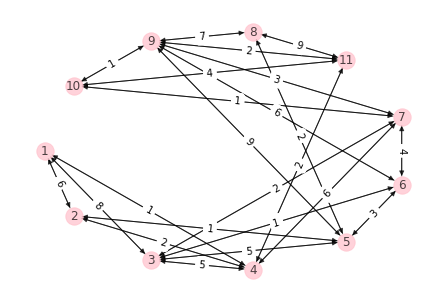

In [3]:
import matplotlib.pyplot as plt
import networkx as nx  
G = nx.Graph()
G.add_weighted_edges_from([(1, 2,6), (1, 3, 8), (1, 4, 1),
                            (2,4,2), (2, 5, 1),
                            (3,4, 5), (3, 5, 5), (3, 6, 1), (3, 7, 2),
                            (4, 7,6),(4,11,2),
                            (5, 6, 3), (5, 8, 2), (5, 9, 9),
                            (6, 7, 4), (6, 9, 6),
                            (7, 9, 3), (7, 10, 1),
                            (8, 9, 7), (8, 11, 9),
                            (9, 10, 1), (9, 11, 2),
                            (10, 11, 4)])# ÊâπÈáèÂä†ÂÖ•ËµãÊùÉËæπÔºåÊ†ºÂºèÔºàÁÇπ1ÔºåÁÇπ2ÔºåÊùÉÂÄºÔºâ


# ‰∏§‰∏™ÊåáÂÆöÈ°∂ÁÇπ‰πãÈó¥ÁöÑÊúÄÁü≠Âä†ÊùÉË∑ØÂæÑ
minWPath_v1_v5 = nx.dijkstra_path(G, source=1, target=5)  # È°∂ÁÇπ 1 Âà∞ È°∂ÁÇπ 5 ÁöÑÊúÄÁü≠Âä†ÊùÉË∑ØÂæÑ
distance = [[0 for i in range(11)]for j in range(11)]
for i in range(1,12):
    for j in range(1,12):
        distance[j-1][i-1] = nx.dijkstra_path_length(G, source = j, target = i)
# ‰∏§‰∏™ÊåáÂÆöÈ°∂ÁÇπ‰πãÈó¥ÁöÑÊúÄÁü≠Âä†ÊùÉË∑ØÂæÑÁöÑÈïøÂ∫¶
lMinWPath_v1_v5 = nx.dijkstra_path_length(G, source=1, target=5)  # ÊúÄÁü≠Âä†ÊùÉË∑ØÂæÑÈïøÂ∫¶
print("È°∂ÁÇπ v1 Âà∞ È°∂ÁÇπ v5 ÁöÑÊúÄÁü≠Âä†ÊùÉË∑ØÂæÑÈïøÂ∫¶: ", lMinWPath_v1_v5)
G = nx.DiGraph(G) #ÊûÑÂª∫ÊúâÂêëÂõæ
layout = nx.shell_layout(G)  #ÊéíÂàóËäÇÁÇπ,‰øùËØÅ‰∏§Ê¨°ÊéíÂàóÊñπÂºè‰∏ÄÊ†∑Ôºå‰ΩøÁ¨¨‰∫åÊ¨°ÁªòÂà∂ÊùÉÂÄºÊó∂Âú®Ëæπ‰∏ä
nx.draw(G, layout,node_color = 'pink',with_labels = True,alpha = 0.7)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, layout, edge_labels=labels)
plt.savefig('graph.png',dpi = 800)
plt.show()


In [4]:
shortp = [[0 for i in range(11)]for j in range(11)]
for i in range(1,12):
    for j in range(1,12):
        shortp[j-1][i-1] = nx.dijkstra_path(G, source = j, target = i)

In [5]:
shortp

[[[1],
  [1, 4, 2],
  [1, 4, 3],
  [1, 4],
  [1, 4, 2, 5],
  [1, 4, 2, 5, 6],
  [1, 4, 7],
  [1, 4, 2, 5, 8],
  [1, 4, 11, 9],
  [1, 4, 11, 9, 10],
  [1, 4, 11]],
 [[2, 4, 1],
  [2],
  [2, 5, 6, 3],
  [2, 4],
  [2, 5],
  [2, 5, 6],
  [2, 5, 6, 3, 7],
  [2, 5, 8],
  [2, 4, 11, 9],
  [2, 4, 11, 9, 10],
  [2, 4, 11]],
 [[3, 4, 1],
  [3, 6, 5, 2],
  [3],
  [3, 4],
  [3, 6, 5],
  [3, 6],
  [3, 7],
  [3, 6, 5, 8],
  [3, 7, 10, 9],
  [3, 7, 10],
  [3, 7, 10, 9, 11]],
 [[4, 1],
  [4, 2],
  [4, 3],
  [4],
  [4, 2, 5],
  [4, 2, 5, 6],
  [4, 7],
  [4, 2, 5, 8],
  [4, 11, 9],
  [4, 11, 9, 10],
  [4, 11]],
 [[5, 2, 4, 1],
  [5, 2],
  [5, 6, 3],
  [5, 2, 4],
  [5],
  [5, 6],
  [5, 6, 3, 7],
  [5, 8],
  [5, 2, 4, 11, 9],
  [5, 6, 3, 7, 10],
  [5, 2, 4, 11]],
 [[6, 3, 4, 1],
  [6, 5, 2],
  [6, 3],
  [6, 3, 4],
  [6, 5],
  [6],
  [6, 3, 7],
  [6, 5, 8],
  [6, 3, 7, 10, 9],
  [6, 3, 7, 10],
  [6, 3, 7, 10, 9, 11]],
 [[7, 4, 1],
  [7, 3, 6, 5, 2],
  [7, 3],
  [7, 4],
  [7, 3, 6, 5],
  [7, 3, 6],
  [7],
 

In [4]:
pass_path = [[0 for i in range(11)]for j in range(11)]
for i in range(1,12):
    for j in range(1,12):
        pass_path[j-1][i-1] = nx.dijkstra_path(G, source = j, target = i)
pass_path

NameError: name 'G2' is not defined

In [28]:
pass_path
#Â¶ÇÊûúÈÄâÊã©‰∫Üpass_path‰∏≠iË°åjÂàóÁöÑË∑ØÁ∫øÔºåÂàôÂ¢ûÂä†Âà∞ÁªèËøáÁöÑÁÇπÈõÜÈáå
re = []
for i in range(len(pass_path)):
    for j in range(len(pass_path[i])):
        if len(pass_path[i][j]) == 2:
            re.append(pass_path[i][j])
graph = []
temp = []
for j in range(1,12):
    for i in range(len(re)):
        if re[i][0] == j:
            temp.append(re[i][1])

    graph.append(temp)
    temp = []
graph

[[2, 4],
 [1, 5],
 [4, 6, 7],
 [1, 3, 7],
 [2, 6, 8],
 [3, 5],
 [3, 4, 10],
 [5, 9, 11],
 [8, 10, 11],
 [7, 9],
 [8, 9]]

Âú®‰∏Ä‰∏™Á±ª‰ºº‰∏äÂõæÁöÑÂ∏¶ÊùÉÂõæ‰∏≠ÂØªÊâæÁªèËøáÊâÄÊúâÁÇπÁöÑÊúÄÂ∞èË∑ØÂæÑÔºåÂÖ∂‰∏≠ÊØèÊù°Ë∑ØÈÉΩÊòØÂèåÂêëÁöÑÔºå‰∏çÂêå‰∫étspÔºå‰∏çËÆæÊúâÊØè‰∏™ÁÇπÂè™ËÉΩÁªèËøá‰∏ÄÊ¨°ÂíåÁªôÂÆöËµ∑ÁÇπ„ÄÅÁªàÁÇπÁöÑÈôêÂà∂Ôºå‰ΩÜ‰∏çÊòØ‰ªªÊÑè‰∏§ÁÇπÈÉΩÂèØ‰ª•Âà∞Ëææ    
ÊàëÊÉ≥‰∫Ü‰∏Ä‰∏ãÂ∫îËØ•ÂèØ‰ª•ËΩ¨ÂåñÊàêtsp„ÄÇ‰∏çËÉΩÂà∞ËææÁöÑÁÇπÂ∞± Ê±Ç‰∏™‰ªñ‰ø©‰πãÈó¥ÁöÑÔºüÊúÄÁü≠Ë∑Ø
>tspÈóÆÈ¢òÔºöÂÅáËÆæÊúâ‰∏Ä‰∏™ÊóÖË°åÂïÜ‰∫∫Ë¶ÅÊãúËÆøn‰∏™ÂüéÂ∏ÇÔºå‰ªñÂøÖÈ°ªÈÄâÊã©ÊâÄË¶ÅËµ∞ÁöÑË∑ØÂæÑÔºåË∑ØÂæÑÁöÑÈôêÂà∂ÊòØÊØè‰∏™ÂüéÂ∏ÇÂè™ËÉΩÊãúËÆø‰∏ÄÊ¨°ÔºåËÄå‰∏îÊúÄÂêéË¶ÅÂõûÂà∞ÂéüÊù•Âá∫ÂèëÁöÑÂüéÂ∏Ç„ÄÇË∑ØÂæÑÁöÑÈÄâÊã©ÁõÆÊ†áÊòØË¶ÅÊ±ÇÂæóÁöÑË∑ØÂæÑË∑ØÁ®ã‰∏∫ÊâÄÊúâË∑ØÂæÑ‰πã‰∏≠ÁöÑÊúÄÂ∞èÂÄº„ÄÇ

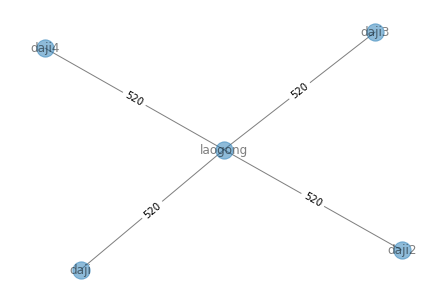

1040


In [8]:
import networkx as nx
from pylab import mpl
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_weighted_edges_from([("daji","laogong",520),
                           ("daji2","laogong",520),("daji3","laogong",520)
                           ,("daji4","laogong",520)])
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, alpha=0.5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
print(nx.dijkstra_path_length(G, source='daji', target='daji2'))

In [1]:
class Solution:
    def shortestPathLength(self, graph: List[List[int]]) -> int:
        q = collections.deque([])
        visited = set()
        n = len(graph)
        for i in range(n):
            q.append((i, 1 << i))
            visited.add((i, 1 << i))
        dis = 0
        while q:
            dis += 1
            for _ in range(len(q)):
                cur, cur_state = q.popleft()
                for nxt in graph[cur]:
                    nxt_state = cur_state | (1 << nxt)
                    if nxt_state == (1 << n) - 1: return dis
                    if (nxt, nxt_state) not in visited:
                        q.append((nxt, nxt_state))
                        visited.add((nxt, nxt_state))
        return 0

NameError: name 'List' is not defined

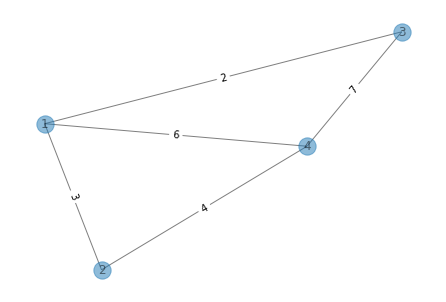

In [2]:
import networkx as nx
from pylab import mpl
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_weighted_edges_from([(1,2,3),
                           (1,3,2),(1,4,6)
                           ,(2,4,4),(3,4,7)])
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, alpha=0.5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [11]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 539.0 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install py2neo

Defaulting to user installation because normal site-packages is not writeable
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 177.0/177.0 kB 435.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
